In [1]:
__imp_eda

In [2]:
import training_data_cleaning_joining as clean

In [3]:
sales_clean = clean.clean_sales_data()
items_clean = clean.clean_items_data()
categories_clean = clean.clean_items_categ_data()
shops_clean = clean.clean_shops_data()

all_train = clean.merge_all_train_data()

test_data = clean.load_test_data()
sample_submission = clean.load_submission_file()

# EDA training data

## Main sales data

In [7]:
sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935843 entries, 0 to 2935848
Data columns (total 12 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      int64
year              int64
month             int64
day_of_month      int64
month_year        object
weekday_name      object
day_of_week       int64
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 291.2+ MB


In [8]:
sales_clean.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day_of_month,month_year,weekday_name,day_of_week
0,2013-01-02,0,59,22154,999.00,1,2013,1,2,2013-01,Wednesday,2
1,2013-01-03,0,25,2552,899.00,1,2013,1,3,2013-01,Thursday,3
2,2013-01-05,0,25,2552,899.00,-1,2013,1,5,2013-01,Saturday,5
3,2013-01-06,0,25,2554,1709.05,1,2013,1,6,2013-01,Sunday,6
4,2013-01-15,0,25,2555,1099.00,1,2013,1,15,2013-01,Tuesday,1


In [8]:
sales_clean.isnull().sum() # no NaN values

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
year              0
month             0
day_of_month      0
month_year        0
weekday_name      0
day_of_week       0
dtype: int64

### Ids

In [6]:
sales_clean['shop_id'].nunique()

60

In [7]:
sales_clean['item_id'].nunique()

21807

In [76]:
sales_clean['item_id'].min(), sales_clean['item_id'].max()

(0, 22169)

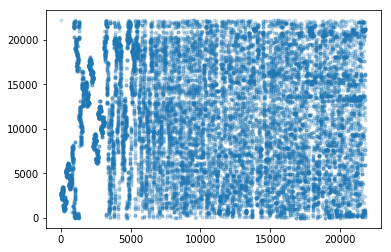

In [103]:
plt.plot(sales_clean['item_id'].unique(), '.', alpha=0.2);

In [152]:
sales_clean['shop_in_test'] = sales_clean['shop_id'].apply(lambda x: x not in shops_not_in_test)

In [189]:
sales_clean[sales_clean['date_block_num']==33].groupby(['shop_id'])['item_id'].nunique().sort_values()

shop_id
34     246
36     258
10     288
20     387
9      390
3      391
2      440
37     444
45     466
55     470
41     476
4      478
49     482
39     482
59     500
16     535
44     549
52     573
14     594
50     603
38     605
5      615
22     626
7      642
53     646
12     650
48     653
24     660
26     680
18     681
15     693
46     700
56     802
58     804
35     820
19     824
47     831
6      954
21     974
57    1216
28    1398
42    1573
25    2210
31    2222
Name: item_id, dtype: int64

In [168]:
shop_id_occurance.sort_values('shop_in_test')

,shop_id,shop_in_test,item_id
0,0,False,3600
54,54,False,13863
51,51,False,8739
43,43,False,6737
40,40,False,817
33,33,False,1900
32,32,False,3299
30,30,False,9512
27,27,False,10842
23,23,False,2949


In [178]:
shops_oct2013 = sales_clean[sales_clean['date_block_num']==33]['shop_id'].unique()

In [185]:
[shop for shop in test_shops if shop not in shops_oct2013]

[]

In [186]:
[shop for shop in shops_oct2013 if shop not in test_shops]

[20, 9]

In [192]:
items_oct2013 = sales_clean[sales_clean['date_block_num']==33]['item_id'].unique()

In [193]:
items_oct2013.shape

(5413,)

### Target value

In [63]:
sales_clean['item_cnt_day'].describe()

count    2.935843e+06
mean     1.242641e+00
std      2.618837e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

In [67]:
# 99.9% of item_cnt_day are smaller or equal to 20
sales_clean[sales_clean['item_cnt_day']<=20].shape[0]/sales_clean.shape[0]

0.9988371312771153

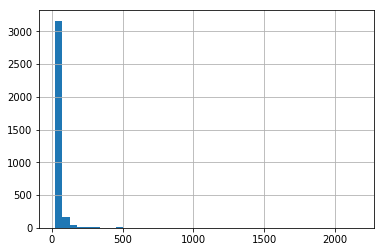

In [73]:
# about 3000 products have sales > 20
sales_clean.loc[sales_clean['item_cnt_day']>20, 'item_cnt_day'].hist(bins=40);

In [19]:
sales_clean.loc[sales_clean['item_cnt_day']<=20, 'item_cnt_day'].value_counts()

 1     2629366
 2      194201
 3       47350
 4       19685
 5       10474
-1        7252
 6        6338
 7        4057
 8        2903
 9        2177
 10       1820
 11       1263
 12       1083
 13        918
 14        716
 15        638
 16        544
 17        438
 18        391
 20        364
 19        347
-2          78
-3          14
-5           4
-4           3
-6           2
-16          1
-22          1
-9           1
Name: item_cnt_day, dtype: int64

In [23]:
sales_by_month = sales_clean.groupby(['date_block_num', 'shop_id', 'item_id'])['item_cnt_day'].sum().reset_index()
sales_by_month.rename(columns={'item_cnt_day':'item_cnt_month'}, inplace=True)

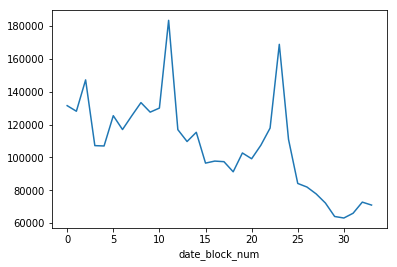

In [24]:
sales_by_month.groupby('date_block_num')['item_cnt_month'].sum().plot()

### Individual features in sales data

#### Sale dates

In [9]:
sales_clean['date'].describe()

count                 2935843
unique                   1034
top       2013-12-28 00:00:00
freq                     9434
first     2013-01-01 00:00:00
last      2015-10-31 00:00:00
Name: date, dtype: object

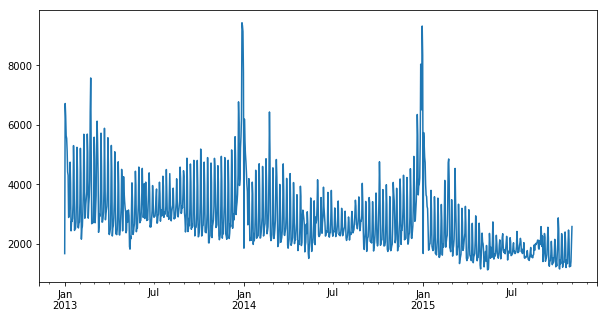

In [10]:
sales_clean['date'].value_counts().sort_index().plot(figsize=(10,5));

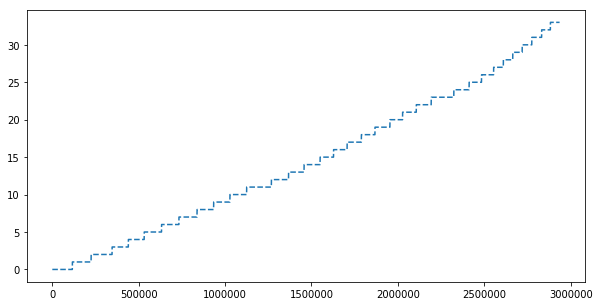

In [11]:
sales_clean['date_block_num'].plot(style='--', figsize=(10,5));

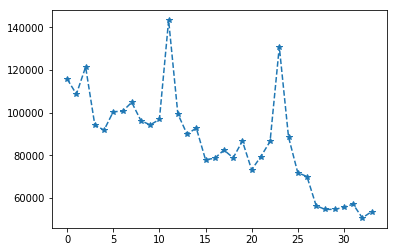

In [12]:
sales_clean['date_block_num'].value_counts().sort_index().plot(style='*--');

#### Shops

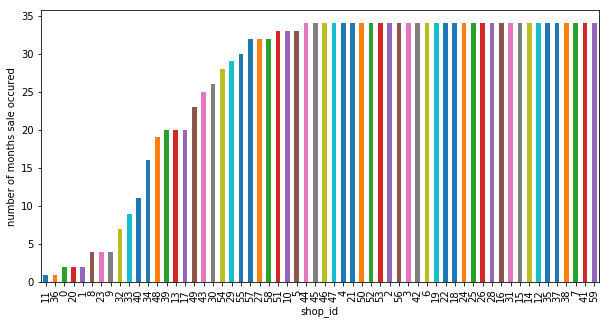

In [13]:
sales_clean.groupby('shop_id')['date_block_num'].nunique().sort_values().plot(kind='bar', figsize=(10,5))
plt.ylabel('number of months sale occured')
plt.show()


In [14]:
sales_clean['item_id'].min(), sales_clean['item_id'].max()

(0, 22169)

#### Items

In [15]:
sales_clean['item_id'].min(), sales_clean['item_id'].max()

(0, 22169)

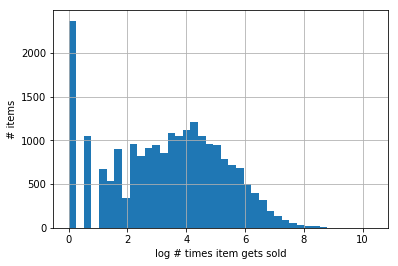

In [16]:
np.log(sales_clean['item_id'].value_counts()).hist(bins=40)
plt.xlabel('log # times item gets sold')
plt.ylabel('# items')
plt.show()

Text(0.5,1,'Number of unique items sold over time')

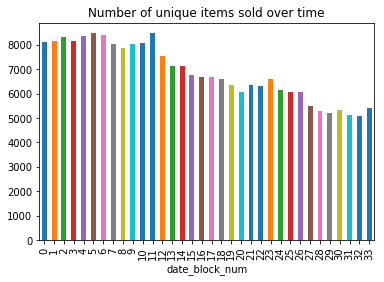

In [200]:
sales_clean.groupby('date_block_num')['item_id'].nunique().plot(kind='bar');
plt.title('Number of unique items sold over time')

#### Item price

In [17]:
# remove one row with price = -1 (probably missing value imputation)
sales_clean = sales_clean[sales_clean['item_price']>0.0]

In [18]:
sales_clean['item_price'].describe()

count    2.935842e+06
mean     8.908538e+02
std      1.729802e+03
min      7.000000e-02
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64

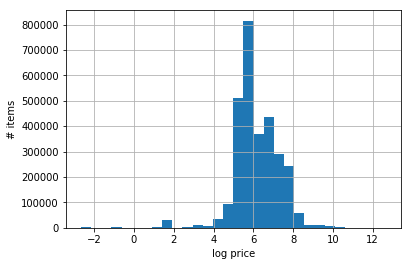

In [19]:
np.log(sales_clean['item_price']).hist(bins=30)
plt.xlabel('log price')
plt.ylabel('# items')
plt.show()

#### Item count per day

In [20]:
sales_clean['item_cnt_day'].describe()

count    2.935842e+06
mean     1.242641e+00
std      2.618838e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

In [21]:
sales_clean[sales_clean['item_cnt_day']<0]['item_cnt_day'].value_counts()

-1     7252
-2       78
-3       14
-5        4
-4        3
-6        2
-9        1
-22       1
-16       1
Name: item_cnt_day, dtype: int64

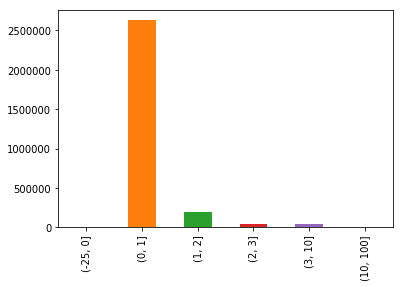

In [22]:
pd.cut(sales_clean['item_cnt_day'], bins=[-25,0,1,2,3,10,100]).value_counts().sort_index().plot(kind='bar');
# usually a row entry is about one item

### Relationship with target

#### Sales over time

In [23]:
sales_clean.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day_of_month,month_year,weekday_name,day_of_week
0,2013-01-02,0,59,22154,999.00,1,2013,1,2,2013-01,Wednesday,2
1,2013-01-03,0,25,2552,899.00,1,2013,1,3,2013-01,Thursday,3
2,2013-01-05,0,25,2552,899.00,-1,2013,1,5,2013-01,Saturday,5
3,2013-01-06,0,25,2554,1709.05,1,2013,1,6,2013-01,Sunday,6
4,2013-01-15,0,25,2555,1099.00,1,2013,1,15,2013-01,Tuesday,1


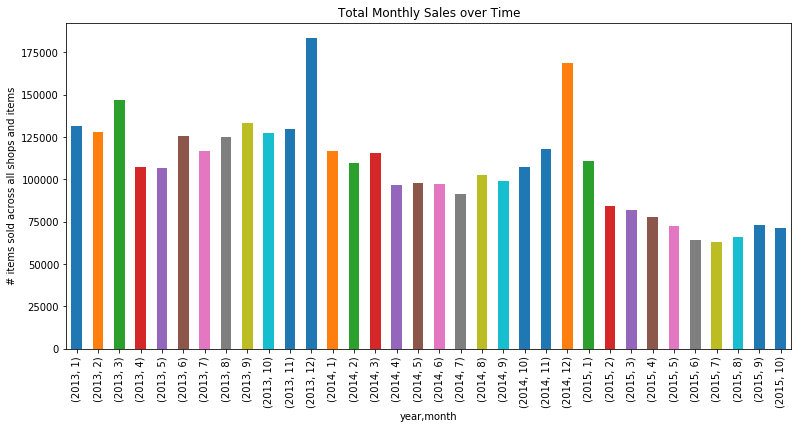

In [24]:
sales_clean.groupby(['year', 'month'])['item_cnt_day'].sum().plot.bar(figsize=(13,6))
plt.ylabel('# items sold across all shops and items')
plt.title('Total Monthly Sales over Time')
plt.show()

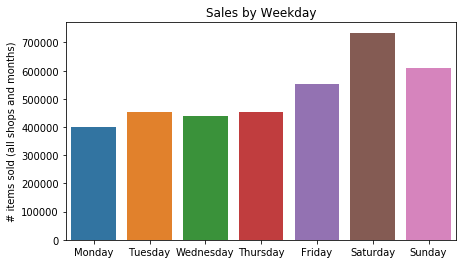

In [25]:
sales_by_weekday = sales_clean.groupby(['weekday_name', 'day_of_week'])['item_cnt_day'].sum().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(x='weekday_name', y='item_cnt_day', data=sales_by_weekday.sort_values(by=['day_of_week']))
plt.xlabel(' ')
plt.ylabel('# items sold (all shops and months)')
plt.title('Sales by Weekday')
plt.show()

#### Shops size by sale

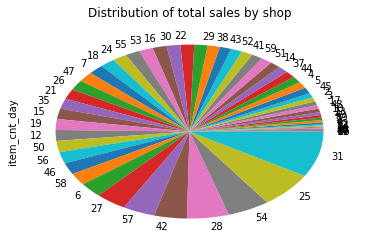

In [26]:
sales_clean.groupby('shop_id')['item_cnt_day'].sum().sort_values().plot(kind='pie')
plt.title('Distribution of total sales by shop')
plt.show()

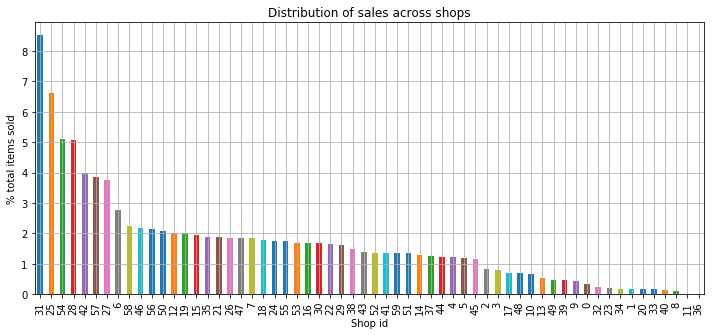

In [27]:
total_items_sold = sales_clean['item_cnt_day'].sum()
pct_items_shop = (100* sales_clean.groupby('shop_id')['item_cnt_day'].sum()/total_items_sold)
pct_items_shop.sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(12,5));
plt.title('Distribution of sales across shops')
plt.ylabel('% total items sold')
plt.xlabel('Shop id')
plt.show()

In [28]:
pct_items_shop.sort_values(ascending=False).head(8).sum()

39.642245392863714

#### Items sold

In [29]:
sales_clean.groupby('item_id')['item_cnt_day'].sum().sort_values().describe()

count     21807.000000
mean        167.294859
std        1366.219932
min         -11.000000
25%           7.000000
50%          33.000000
75%         124.000000
max      187642.000000
Name: item_cnt_day, dtype: float64

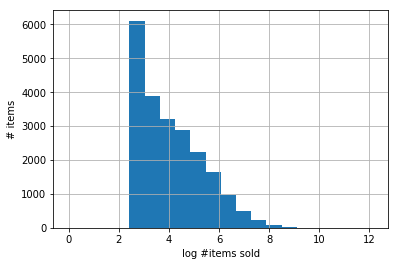

In [30]:
np.log(sales_clean.groupby('item_id')['item_cnt_day'].sum() + 12).hist(bins=20)
plt.xlabel('log #items sold')
plt.ylabel('# items')
plt.show()

#### Item price and sales

In [31]:
item_price_sale = sales_clean.groupby('item_id').agg({'item_price':['mean'], 'item_cnt_day':['sum']})

### Relationship between features

#### Shops over time

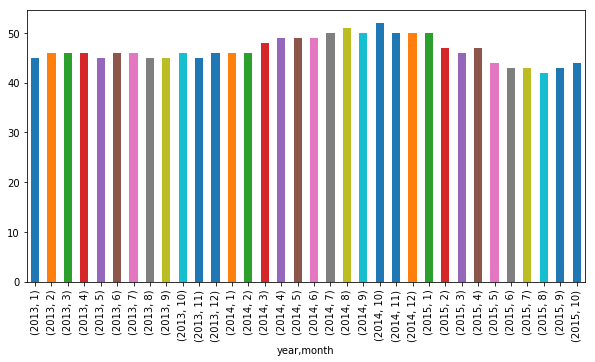

In [32]:
sales_clean.groupby(['year', 'month'])['shop_id'].nunique().plot(kind='bar', figsize=(10,5));

In [33]:
sales_times = sales_clean.groupby('shop_id')['month_year'].agg([np.min, np.max]).reset_index()

In [34]:
sales_times.rename(columns={'amin':'first_sale_month',
                            'amax': 'last_sale_month'}, inplace=True)

In [35]:
sales_times.groupby(['last_sale_month', 'first_sale_month']).count()

shop_id
last_sale_month first_sale_month         
2013-02         2013-01                 2
2013-04         2013-01                 2
2013-07         2013-01                 1
2014-08         2013-01                 1
2015-01         2013-01                 1
                2013-06                 1
                2014-03                 1
2015-02         2013-01                 1
                2015-02                 1
2015-04         2013-01                 1
                2014-08                 1
2015-05         2013-01                 1
2015-09         2013-01                 2
2015-10         2013-01                33
                2013-02                 1
                2013-03                 2
                2013-05                 1
                2013-10                 1
                2013-12                 1
                2014-03                 1
                2014-04                 1
                2014-07                 1
                2014-10                 1
                2015-10                 1

In [36]:
sales_clean.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day_of_month,month_year,weekday_name,day_of_week
0,2013-01-02,0,59,22154,999.00,1,2013,1,2,2013-01,Wednesday,2
1,2013-01-03,0,25,2552,899.00,1,2013,1,3,2013-01,Thursday,3
2,2013-01-05,0,25,2552,899.00,-1,2013,1,5,2013-01,Saturday,5
3,2013-01-06,0,25,2554,1709.05,1,2013,1,6,2013-01,Sunday,6
4,2013-01-15,0,25,2555,1099.00,1,2013,1,15,2013-01,Tuesday,1


#### How many items shops sell

In [37]:
total_unique_items = sales_clean['item_id'].nunique()
pct_unique_items = (100 * sales_clean.groupby('shop_id')['item_id'].nunique()/total_unique_items)

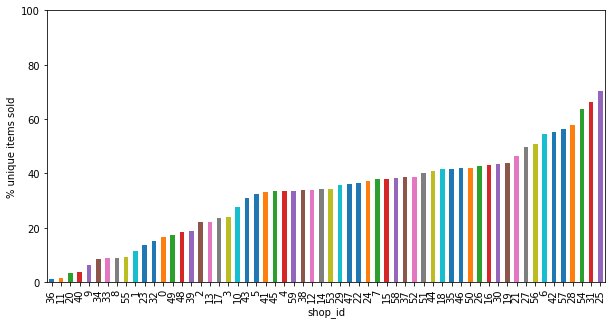

In [38]:
pct_unique_items.sort_values().plot(kind='bar', figsize=(10,5), ylim=(0,100))
plt.ylabel('% unique items sold')
plt.show()

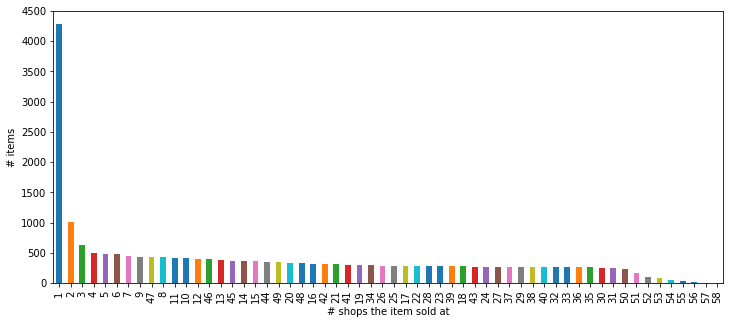

In [39]:
item_shops = sales_clean.groupby('item_id')['shop_id'].nunique()  # in how many shops are items sold
item_shops.value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(12,5))
plt.ylabel('# items')
plt.xlabel('# shops the item sold at')
plt.show()

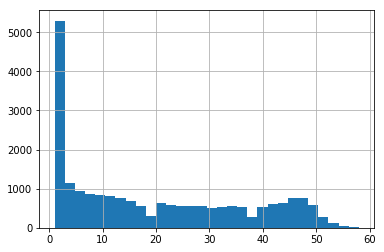

In [40]:
sales_clean.groupby('item_id')['shop_id'].nunique().hist(bins=30);

In [41]:
sales_clean.groupby('item_id')['item_cnt_day'].sum().describe()

count     21807.000000
mean        167.294859
std        1366.219932
min         -11.000000
25%           7.000000
50%          33.000000
75%         124.000000
max      187642.000000
Name: item_cnt_day, dtype: float64

## EDA item background data

In [42]:
items_clean.head()

,item_name,item_id,item_category_id,item_name_proc
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,ABBYY FineReader 12 Professional Edition Full ...
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,В ЛУЧАХ СЛАВЫ (UNV) D
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,ГОЛУБАЯ ВОЛНА (Univ) D
4,***КОРОБКА (СТЕКЛО) D,4,40,КОРОБКА (СТЕКЛО) D


In [43]:
items_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 4 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
item_name_proc      22170 non-null object
dtypes: int64(2), object(2)
memory usage: 692.9+ KB


In [44]:
items_clean['item_category_id'].nunique()

84

In [45]:
categories_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
item_category_name        84 non-null object
item_category_id          84 non-null int64
item_category_name_eng    84 non-null object
item_category_group       84 non-null category
dtypes: category(1), int64(1), object(2)
memory usage: 2.9+ KB


In [46]:
categories_clean.sample(5)

,item_category_name,item_category_id,item_category_name_eng,item_category_group
75,Программы - Для дома и офиса,75,Programs - Home and Office,Programs
32,"Карты оплаты (Кино, Музыка, Игры)",32,"Payment cards (Movies, Music, Games)","Payment cards (Movies, Music, Games)"
18,Игры - PS2,18,Games - PS2,Games
54,Книги - Цифра,54,Books - Number,Books
0,PC - Гарнитуры/Наушники,0,PC - Headsets / Headphones,PC


## EDA shops data

In [47]:
shops_clean.head()

,shop_name,shop_id,shop_name_eng,shop_city
0,"!Якутск Орджоникидзе, 56 фран",0,"yakutsk ordzhonikidze, 56 francs",yakutsk
1,"!Якутск ТЦ ""Центральный"" фран",1,"yakutsk tc ""central"" franc",yakutsk
2,"Адыгея ТЦ ""Мега""",2,"adygea shopping center ""mega""",adygea
3,"Балашиха ТРК ""Октябрь-Киномир""",3,"balashikha trk ""october-kinomir""",balashikha
4,"Волжский ТЦ ""Волга Молл""",4,"volzhsky shopping center ""volga mall""",volzhsky


In [48]:
shops_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
shop_name        60 non-null object
shop_id          60 non-null int64
shop_name_eng    60 non-null object
shop_city        60 non-null category
dtypes: category(1), int64(1), object(2)
memory usage: 3.0+ KB


# EDA test data

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB


In [77]:
test_data.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [50]:
test_data['shop_id'].nunique()

42

In [204]:
test_data['item_id'].nunique()

5100

In [205]:
test_data['shop_id'].nunique() * test_data['item_id'].nunique()

214200

In [138]:
test_shops = test_data['shop_id'].unique()

In [139]:
train_shops = sales_clean['shop_id'].unique()

In [142]:
np.sort(test_shops)

array([ 2,  3,  4,  5,  6,  7, 10, 12, 14, 15, 16, 18, 19, 21, 22, 24, 25,
       26, 28, 31, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49,
       50, 52, 53, 55, 56, 57, 58, 59])

In [143]:
np.sort(train_shops)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [146]:
shops_not_in_test = [shop for shop in train_shops if shop not in test_shops]

In [145]:
[shop for shop in test_shops if shop not in train_shops]

[]

In [121]:
test_data['shop_id'].value_counts().sort_index()

2     5100
3     5100
4     5100
5     5100
6     5100
7     5100
10    5100
12    5100
14    5100
15    5100
16    5100
18    5100
19    5100
21    5100
22    5100
24    5100
25    5100
26    5100
28    5100
31    5100
34    5100
35    5100
36    5100
37    5100
38    5100
39    5100
41    5100
42    5100
44    5100
45    5100
46    5100
47    5100
48    5100
49    5100
50    5100
52    5100
53    5100
55    5100
56    5100
57    5100
58    5100
59    5100
Name: shop_id, dtype: int64

In [129]:
test_data.groupby('shop_id')['item_id'].aggregate(['min', 'max', 'mean', 'std', 'sum'])

,min,max,mean,std,sum
shop_id,,,,,
2,30,22167,11019.398627,6253.243088,56198933
3,30,22167,11019.398627,6253.243088,56198933
4,30,22167,11019.398627,6253.243088,56198933
5,30,22167,11019.398627,6253.243088,56198933
6,30,22167,11019.398627,6253.243088,56198933
7,30,22167,11019.398627,6253.243088,56198933
10,30,22167,11019.398627,6253.243088,56198933
12,30,22167,11019.398627,6253.243088,56198933
14,30,22167,11019.398627,6253.243088,56198933


In [51]:
test_data['item_id'].nunique()

5100

In [78]:
test_data['item_id'].min(), test_data['item_id'].max()

(30, 22167)

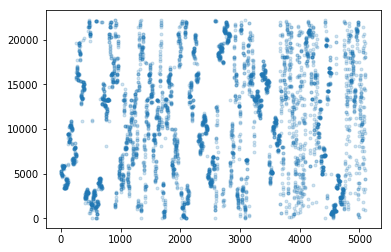

In [114]:
plt.plot(test_data['item_id'].unique(), '.', alpha=0.2);

In [202]:
test_data.groupby('item_id')['shop_id'].nunique()

item_id
30       42
31       42
32       42
33       42
38       42
42       42
45       42
51       42
53       42
57       42
59       42
62       42
64       42
67       42
69       42
70       42
72       42
76       42
80       42
83       42
88       42
91       42
93       42
109      42
138      42
140      42
149      42
153      42
154      42
166      42
         ..
22022    42
22035    42
22050    42
22054    42
22059    42
22060    42
22068    42
22069    42
22071    42
22087    42
22088    42
22091    42
22092    42
22100    42
22101    42
22102    42
22104    42
22105    42
22106    42
22111    42
22118    42
22137    42
22139    42
22145    42
22154    42
22162    42
22163    42
22164    42
22166    42
22167    42
Name: shop_id, Length: 5100, dtype: int64

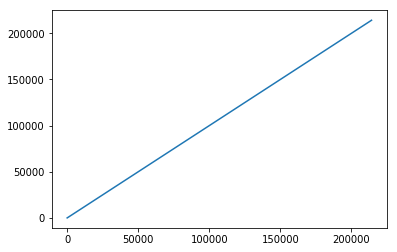

In [7]:
test_data['ID'].plot();

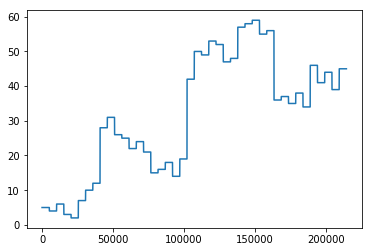

In [6]:
test_data['shop_id'].plot();

# Submission data

In [201]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [10]:
sample_submission.shape

(214200, 2)

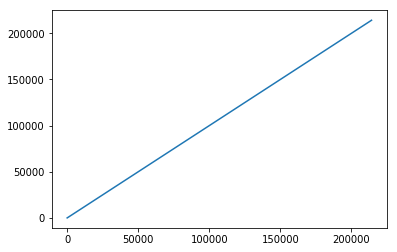

In [9]:
sample_submission['ID'].plot();

# All training data joined

In [4]:
all_train.shape

(2935843, 17)

In [5]:
all_train.head().T

,0,1,2,3,4
date,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-20 00:00:00,2013-01-23 00:00:00
date_block_num,0,0,0,0,0
year,2013,2013,2013,2013,2013
month,1,1,1,1,1
day_of_month,2,2,3,20,23
month_year,2013-01,2013-01,2013-01,2013-01,2013-01
shop_id,59,25,25,25,25
shop_name,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум""","Москва ТРК ""Атриум""","Москва ТРК ""Атриум""","Москва ТРК ""Атриум"""
shop_name_eng,"yaroslavl shopping center ""altair""","moscow trk ""atrium""","moscow trk ""atrium""","moscow trk ""atrium""","moscow trk ""atrium"""
shop_city,yaroslavl,moscow,moscow,moscow,moscow


In [3]:
all_train['shop_name_eng'].unique()

array(['yaroslavl shopping center "altair"', 'moscow trk "atrium"',
       'moscow tc "budenovskiy" (pav.k7)',
       'moscow tc "budenovskiy" (pav.a2)', 'moscow mtrts "afi mall"',
       'moscow тц "mega teply stan" ii',
       'moscow тц "mega belaya dacha ii"',
       'voronezh (plekhanovskaya, 13)', 'voronezh sec "maksimir"',
       'yakutsk ordzhonikidze, 56 francs', 'yakutsk tc "central" franc',
       'kolomna shopping center "rio"', 'kaluga sec "xxi century"',
       'moscow тц "семеновский"', 'n.novgorod sec "fantastic"',
       'chekhov sec "carnival"', 'khimki shopping center "mega"',
       'surgut shopping and entertainment center "city mall"',
       'spb tc "nevsky center"', 'tyumen shopping center "green beach"',
       'omsk shopping center "mega"', 'samara tc "melody"',
       'novosibirsk shopping center "mega"',
       'sergiev posad shopping center "7ya"', 'yakutsk ordzhonikidze, 56',
       'yakutsk central shopping center', 'kursk tc "pushkinsky"',
       'moscow

In [214]:
#all_train.to_csv('all_train_Oct14.csv')